## PREDICTION OF ANGINA

In [1]:
#importing all the required python libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns
import os
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.1.1


In [2]:
#reading the angina data in the form of csv file

df = pd.read_csv("ang.csv")
df.head(5)

,status,age,smoke,cig,hyper,angfam,myofam,strokefam,diabetes
0,no,37,1,15.0,1,no,no,no,no
1,no,45,3,0.0,1,no,no,no,no
2,yes,60,3,0.0,1,no,yes,no,no
3,no,57,3,0.0,1,no,no,no,no
4,yes,65,1,20.0,2,no,yes,no,no


In [3]:
#understanding the type of data column wise

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
status       200 non-null object
age          200 non-null int64
smoke        200 non-null int64
cig          199 non-null float64
hyper        200 non-null int64
angfam       200 non-null object
myofam       200 non-null object
strokefam    200 non-null object
diabetes     198 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ KB


In [4]:
df.describe()

,age,smoke,cig,hyper
count,200.000000,200.000000,199.000000,200.000000
mean,52.445000,1.975000,8.246231,1.315000
std,9.400469,0.893514,11.676389,0.589502
min,29.000000,1.000000,0.000000,1.000000
25%,46.000000,1.000000,0.000000,1.000000
50%,53.000000,2.000000,0.000000,1.000000
75%,59.000000,3.000000,17.500000,1.250000
max,74.000000,3.000000,40.000000,3.000000


In [5]:
df.describe(include = "all")

,status,age,smoke,cig,hyper,angfam,myofam,strokefam,diabetes
count,200,200.000000,200.000000,199.000000,200.000000,200,200,200,198
unique,2,NaN,NaN,NaN,NaN,2,2,2,2
top,yes,NaN,NaN,NaN,NaN,no,no,no,no
freq,100,NaN,NaN,NaN,NaN,179,135,188,191
mean,NaN,52.445000,1.975000,8.246231,1.315000,NaN,NaN,NaN,NaN
std,NaN,9.400469,0.893514,11.676389,0.589502,NaN,NaN,NaN,NaN
min,NaN,29.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,46.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,53.000000,2.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,59.000000,3.000000,17.500000,1.250000,NaN,NaN,NaN,NaN


In [6]:
#checking the dimensions

print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

# checking for null cells

df.isnull().sum()

Number of rows in the dataset:  200
Number of columns in the dataset:  9


status       0
age          0
smoke        0
cig          1
hyper        0
angfam       0
myofam       0
strokefam    0
diabetes     2
dtype: int64

In [7]:
#Filling the null cells

print(df.cig.isnull().sum())
print(df.diabetes.isnull().sum())
mean= df["cig"].mean()
df["cig"].fillna(mean,inplace= True)
df["diabetes"].fillna(1,inplace= True)
print(df.cig.isnull().sum())
print(df.diabetes.isnull().sum())
df.isnull().sum()

1
2
0
0


status       0
age          0
smoke        0
cig          0
hyper        0
angfam       0
myofam       0
strokefam    0
diabetes     0
dtype: int64

In [8]:
#converting categorical data to quantitave data

df=df.replace("no",0)
df=df.replace("yes",1)
df

,status,age,smoke,cig,hyper,angfam,myofam,strokefam,diabetes
0,0,37,1,15.0,1,0,0,0,0
1,0,45,3,0.0,1,0,0,0,0
2,1,60,3,0.0,1,0,1,0,0
3,0,57,3,0.0,1,0,0,0,0
4,1,65,1,20.0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
195,0,58,2,0.0,3,0,0,0,0
196,0,57,3,0.0,1,0,0,0,0
197,0,65,1,10.0,1,0,0,0,0
198,1,73,1,15.0,2,0,1,0,0


In [9]:
# saving the changed dataframe to another csv file

df.to_csv('angdf.csv')

In [10]:
df1 = pd.read_csv("angdf.csv")
df1.drop(['Unnamed: 0'],axis=1,inplace=True)
df1

,status,age,smoke,cig,hyper,angfam,myofam,strokefam,diabetes
0,0,37,1,15.0,1,0,0,0,0
1,0,45,3,0.0,1,0,0,0,0
2,1,60,3,0.0,1,0,1,0,0
3,0,57,3,0.0,1,0,0,0,0
4,1,65,1,20.0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
195,0,58,2,0.0,3,0,0,0,0
196,0,57,3,0.0,1,0,0,0,0
197,0,65,1,10.0,1,0,0,0,0
198,1,73,1,15.0,2,0,1,0,0


# Data normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

to_normalize = ['cig']

x = df1[to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=to_normalize, index = df1.index)
df1[to_normalize] = df_temp

df_temp

,cig
0,0.375
1,0.000
2,0.000
3,0.000
4,0.500
...,...
195,0.000
196,0.000
197,0.250
198,0.375


In [12]:
#adding the normalised column to the dataframe 

df1.drop(df1.columns[[3]], axis = 1, inplace = True) 
df1=pd.concat([df1,df_temp],axis=1)
df1

,status,age,smoke,hyper,angfam,myofam,strokefam,diabetes,cig
0,0,37,1,1,0,0,0,0,0.375
1,0,45,3,1,0,0,0,0,0.000
2,1,60,3,1,0,1,0,0,0.000
3,0,57,3,1,0,0,0,0,0.000
4,1,65,1,2,0,1,0,0,0.500
...,...,...,...,...,...,...,...,...,...
195,0,58,2,3,0,0,0,0,0.000
196,0,57,3,1,0,0,0,0,0.000
197,0,65,1,1,0,0,0,0,0.250
198,1,73,1,2,0,1,0,0,0.375


In [13]:
df1.to_csv('angdf1.csv')

In [14]:
# reading the final dataframe

dfl = pd.read_csv("angdf1.csv")
dfl.drop(['Unnamed: 0'],axis=1,inplace=True)
dfl

,status,age,smoke,hyper,angfam,myofam,strokefam,diabetes,cig
0,0,37,1,1,0,0,0,0,0.375
1,0,45,3,1,0,0,0,0,0.000
2,1,60,3,1,0,1,0,0,0.000
3,0,57,3,1,0,0,0,0,0.000
4,1,65,1,2,0,1,0,0,0.500
...,...,...,...,...,...,...,...,...,...
195,0,58,2,3,0,0,0,0,0.000
196,0,57,3,1,0,0,0,0,0.000
197,0,65,1,1,0,0,0,0,0.250
198,1,73,1,2,0,1,0,0,0.375


# Data visualisation
.Diabetes vs angia

.Smoking vs angia

.Diabetes vs hypertension

In [16]:
dfl['status'].value_counts()

1    100
0    100
Name: status, dtype: int64

In [17]:
df['diabetes'].value_counts()

0    191
1      9
Name: diabetes, dtype: int64

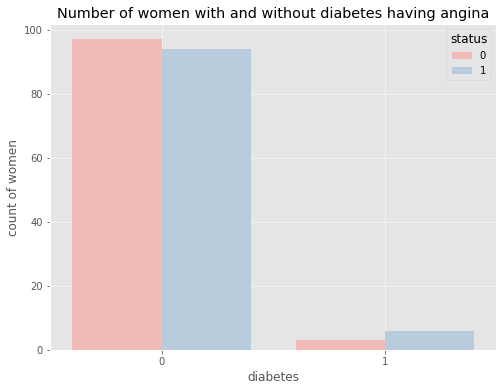

In [18]:
#Diabetes vs angia
#Using seaborn plotting 

#Number of women with and without diabetes having angina
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="diabetes", hue="status", data=dfl, palette="Pastel1")
ax.set(ylabel='count of women')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.title("Number of women with and without diabetes having angina")
plt.show()

9
100


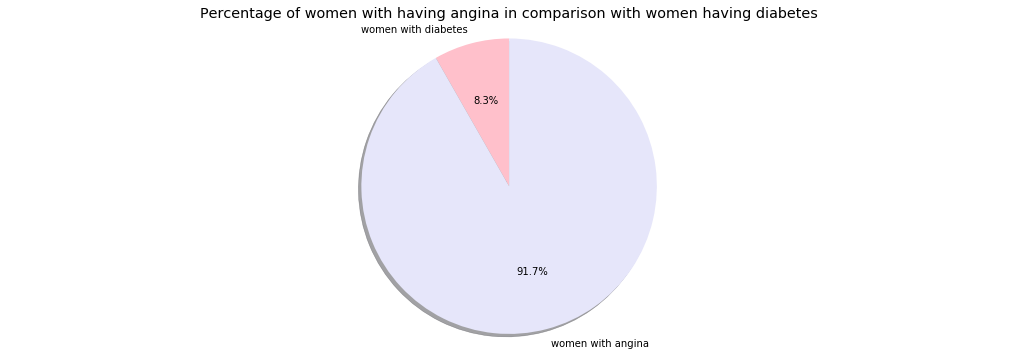

In [19]:
#Percentage of women with having angina in comparison with women having diabetes
dia =len(dfl[dfl['diabetes'] == 1])
angina = len(dfl[dfl['status']== 1])
print(dia)
print(angina)

plt.figure(figsize=(18,6))


labels = 'women with diabetes','women with angina'
sizes = [dia,angina]
colors = ['pink', 'lavender']
explode = (0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage of women with having angina in comparison with women having diabetes")

plt.axis('equal')
plt.show()

In [20]:
#grouping data
data_dia=dfl.groupby('status')['diabetes'].value_counts()
data_dia

status  diabetes
0       0           97
        1            3
1       0           94
        1            6
Name: diabetes, dtype: int64

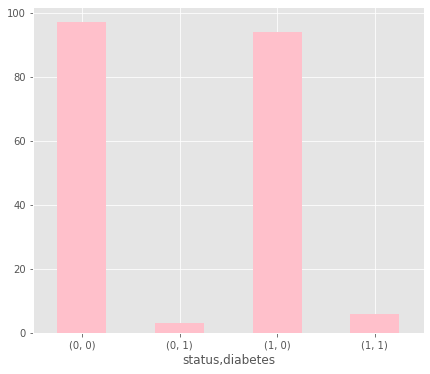

In [21]:
#plot
data_dia.plot(kind='bar', figsize=(7, 6), rot=0, color='pink')

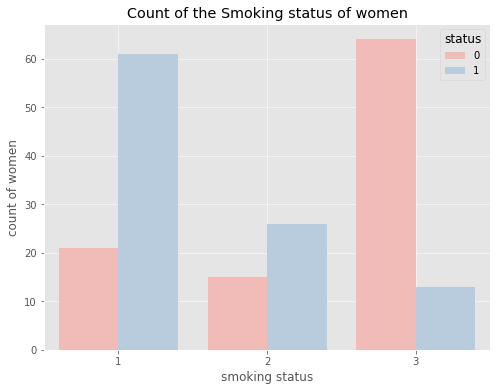

In [22]:
#Smoking vs angia
#smoking status (1=current-, 2=ex-, 3=non-smoker)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="smoke", hue="status", data=dfl, palette="Pastel1")
ax.set(xlabel='smoking status',ylabel='count of women')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.title("Count of the Smoking status of women")
plt.show()

status  smoke
0       3        64
        1        21
        2        15
1       1        61
        2        26
        3        13
Name: smoke, dtype: int64


Text(0.5, 1.0, 'Smoking status of number of people having angina')

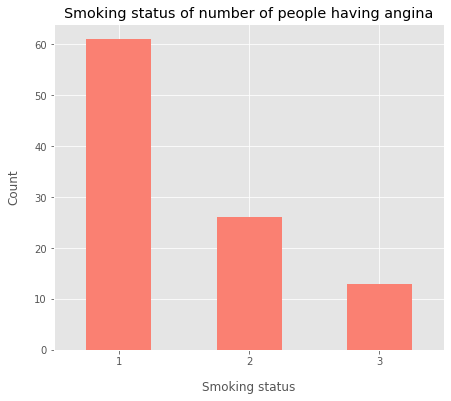

In [23]:
#grouping data

data_smk=dfl.groupby('status')['smoke'].value_counts()
print(data_smk)

#plot
data_smk[1].plot(kind='bar', figsize=(7, 6), rot=0, color='salmon')
plt.ylabel("Count", labelpad=14)
plt.xlabel("Smoking status", labelpad=14)
plt.title("Smoking status of number of people having angina")

Text(0.5, 1.0, 'Showing the relation between age group and cig per day')

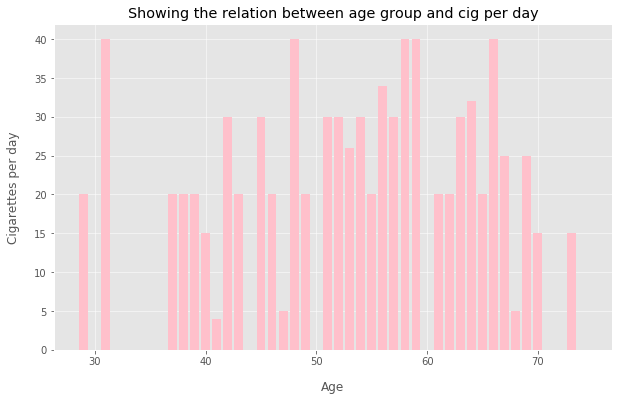

In [24]:
#Smoking vs angia
#data visualisation using matplotlib
#showing the relationship between age and cigarette habits

cig=df.cig
age=dfl.age

plt.figure(figsize=(10,6))
plt.bar(age,cig,color='pink')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Cigarettes per day", labelpad=14)

plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Showing the relation between age group and cig per day")

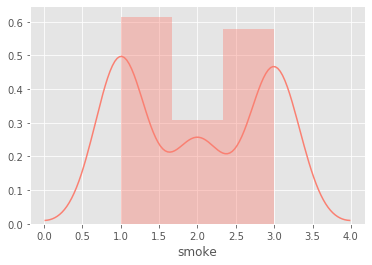

In [25]:
sns.distplot(df['smoke'],color='salmon')

In [26]:
#Diabetes vs hypertension

data_hyp=dfl.groupby('hyper')['diabetes'].value_counts()
data_hyp
#hypertension (1=absent, 2=mild, 3=moderate)

hyper  diabetes
1      0           144
       1             6
2      0            36
       1             1
3      0            11
       1             2
Name: diabetes, dtype: int64

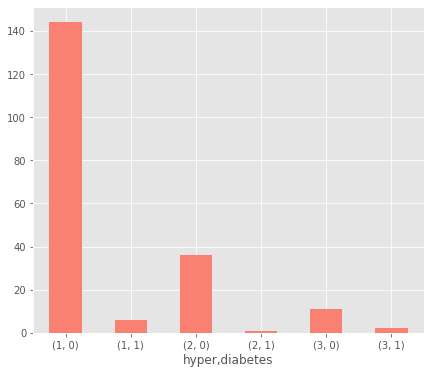

In [27]:
#plot
data_hyp.plot(kind='bar', figsize=(7, 6), rot=0, color='salmon')

9
150
100


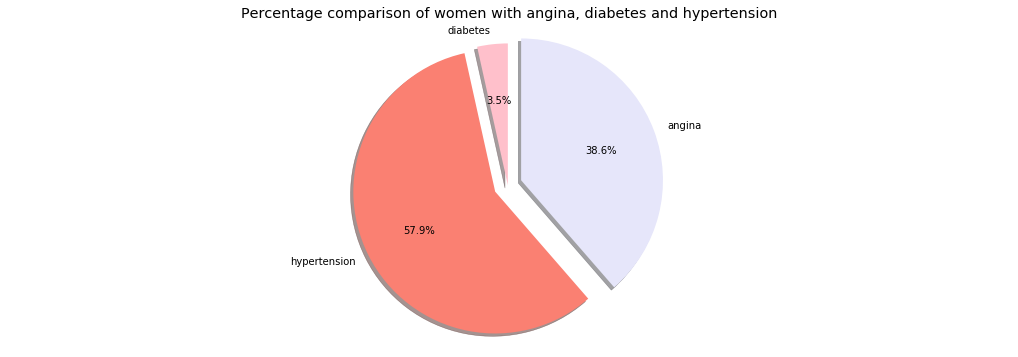

In [28]:
#Angina vs hypertension

#hypertension (1=absent, 2=mild, 3=moderate)
dia =len(dfl[dfl['diabetes'] == 1])
hyp = len(dfl[dfl['hyper']== 1])
ang = len(dfl[dfl['status']== 1])

print(dia)
print(hyp)
print(ang)
plt.figure(figsize=(18,6))


labels = 'diabetes','hypertension','angina'
sizes = [dia,hyp,ang]
colors = ['pink', 'salmon','lavender']
explode = (0,0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage comparison of women with angina, diabetes and hypertension") 
plt.axis('equal')
plt.show()

In [29]:
#grouping data
data_fam=dfl.groupby('angfam')['status'].value_counts()
data_fam

angfam  status
0       0         94
        1         85
1       1         15
        0          6
Name: status, dtype: int64

Text(0.5, 1.0, 'Number of people having angina whose family has a history of angina')

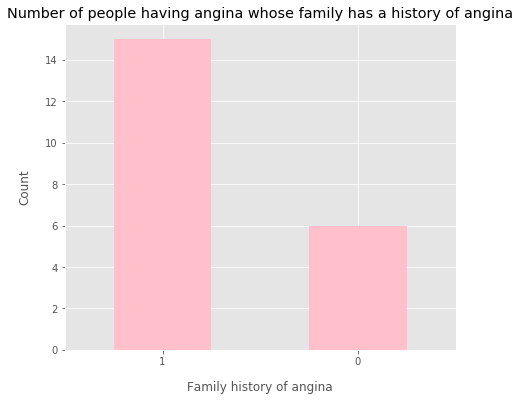

In [30]:
#plot
data_fam[1].plot(kind='bar', figsize=(7, 6), rot=0, color='pink')
plt.ylabel("Count", labelpad=14)
plt.xlabel("Family history of angina", labelpad=14)
plt.title("Number of people having angina whose family has a history of angina")

Text(0.5, 1.0, 'showing the relation between age group and mean angina')

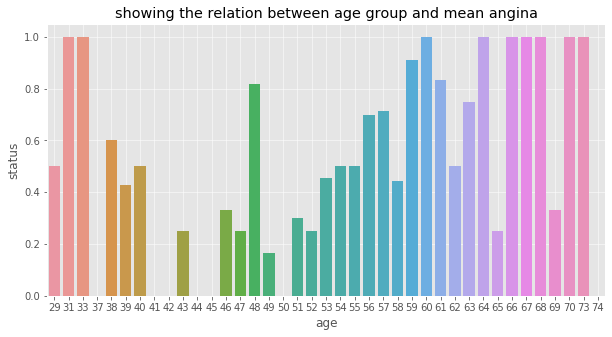

In [31]:
#data visualisation using seaborn
#showing the relation between each age group and their mean angina
data_age = dfl.groupby("age", as_index=False).status.mean()

plt.figure(figsize=(10,5))
sns.barplot(x=data_age["age"], y=data_age["status"])

plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("showing the relation between age group and mean angina")

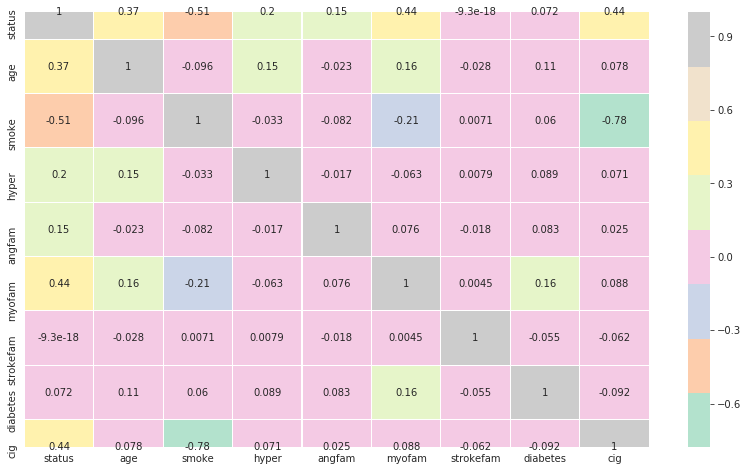

In [32]:
#plotting a heatmap to understand the relationship between each parameter

sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.heatmap(dfl.corr(), annot = True, cmap='Pastel2',linewidths=.1)
plt.show()

# Prediction

In [33]:
# Splitting data into train and test dataset

X= dfl.drop('status',axis=1)
y=dfl['status']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)


In [34]:
X_train,X_test

(     age  smoke  hyper  angfam  myofam  strokefam  diabetes    cig
 169   45      3      1       0       0          0         0  0.000
 97    29      3      1       0       0          0         0  0.000
 31    61      1      3       0       1          0         1  0.250
 12    38      3      1       0       0          0         0  0.000
 35    69      3      1       0       0          0         1  0.000
 ..   ...    ...    ...     ...     ...        ...       ...    ...
 106   49      1      1       1       0          0         0  0.500
 14    49      3      1       0       0          0         0  0.000
 92    51      3      1       0       0          0         0  0.000
 179   49      1      2       0       0          0         0  0.075
 102   49      3      1       0       0          0         0  0.000
 
 [140 rows x 8 columns],
      age  smoke  hyper  angfam  myofam  strokefam  diabetes       cig
 95    67      3      3       0       1          1         0  0.000000
 15    48      

In [35]:
y_train,y_test

(169    0
 97     0
 31     1
 12     0
 35     0
       ..
 106    1
 14     0
 92     0
 179    0
 102    0
 Name: status, Length: 140, dtype: int64, 95     1
 15     1
 30     1
 158    1
 128    0
 115    1
 69     1
 170    1
 174    0
 45     0
 66     0
 182    0
 165    1
 78     0
 186    0
 177    0
 56     1
 152    0
 82     0
 68     0
 124    1
 16     1
 148    1
 93     1
 65     1
 60     1
 84     1
 67     1
 125    0
 132    1
 9      1
 18     0
 55     1
 75     1
 150    0
 104    0
 135    1
 137    1
 164    0
 76     1
 79     1
 197    0
 38     0
 24     0
 122    1
 195    0
 29     0
 19     0
 143    1
 86     0
 114    0
 173    0
 5      1
 126    1
 117    1
 73     1
 140    0
 98     1
 172    0
 96     1
 Name: status, dtype: int64)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()

# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

## PREDICTION

In [40]:
#Making predictions
predict = log_model.predict(X_test)
predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

# Accuracy Metrics

In [41]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7833333333333333
Using Logistic Regression we get an accuracy score of:  78.333 %


In [42]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        27
           1       0.86      0.73      0.79        33

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[23,  4],
       [ 9, 24]])

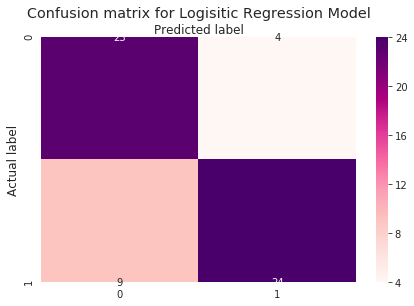

In [45]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'RdPu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

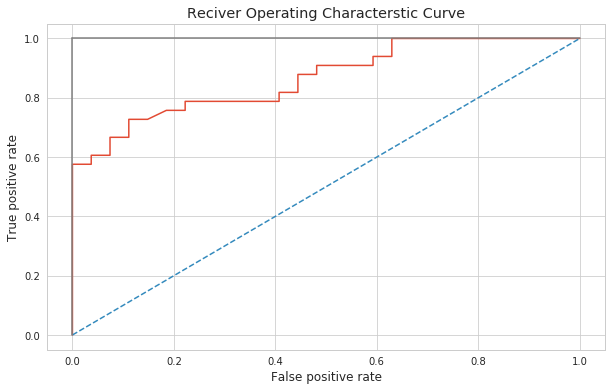

0.8658810325476991

In [44]:
#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_log)                                                         
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)